# Transcrevendo uma Imagem em Texto com AWS Textract
Autor: Wagner Brito<br>
Data: 09/01/2025<br>

Notebook desenvolvido para atender ao desafio **Transcrevendo uma Imagem em Texto com AWS Textract** que faz parte do bootcamp **Nexa - Análise Avançada de Imagens e Texto com IA na AWS**.

## Imports

In [3]:
import json
from pathlib import Path
from typing import Dict, List, Tuple

In [18]:
import boto3

In [5]:
from mypy_boto3_textract.type_defs import BlockTypeDef

In [17]:
import base64
from botocore.exceptions import ClientError

## Funções auxiliares

In [53]:
# Removendo o '.' do início dos itens da lista
def remover_pontos_iniciais(lista):
  """
  Remove o ponto inicial de cada string em uma lista.

  Args:
    lista: A lista de strings.

  Returns:
    Uma nova lista com os pontos iniciais removidos.
  """

  nova_lista = []
  for palavra in lista:
    if palavra.startswith('.'):
      nova_lista.append(palavra[1:])
    else:
      nova_lista.append(palavra)
  return nova_lista

In [74]:
def salvar_lista_como_json(lista, nome_arquivo):
  """
  Salva uma lista como um arquivo JSON.

  Args:
    lista: A lista a ser salva.
    nome_arquivo: O nome do arquivo JSON a ser criado.
  """

  with open(nome_arquivo, 'w') as arquivo:
    json.dump(lista, arquivo, indent=4)

## Execução das rotinas

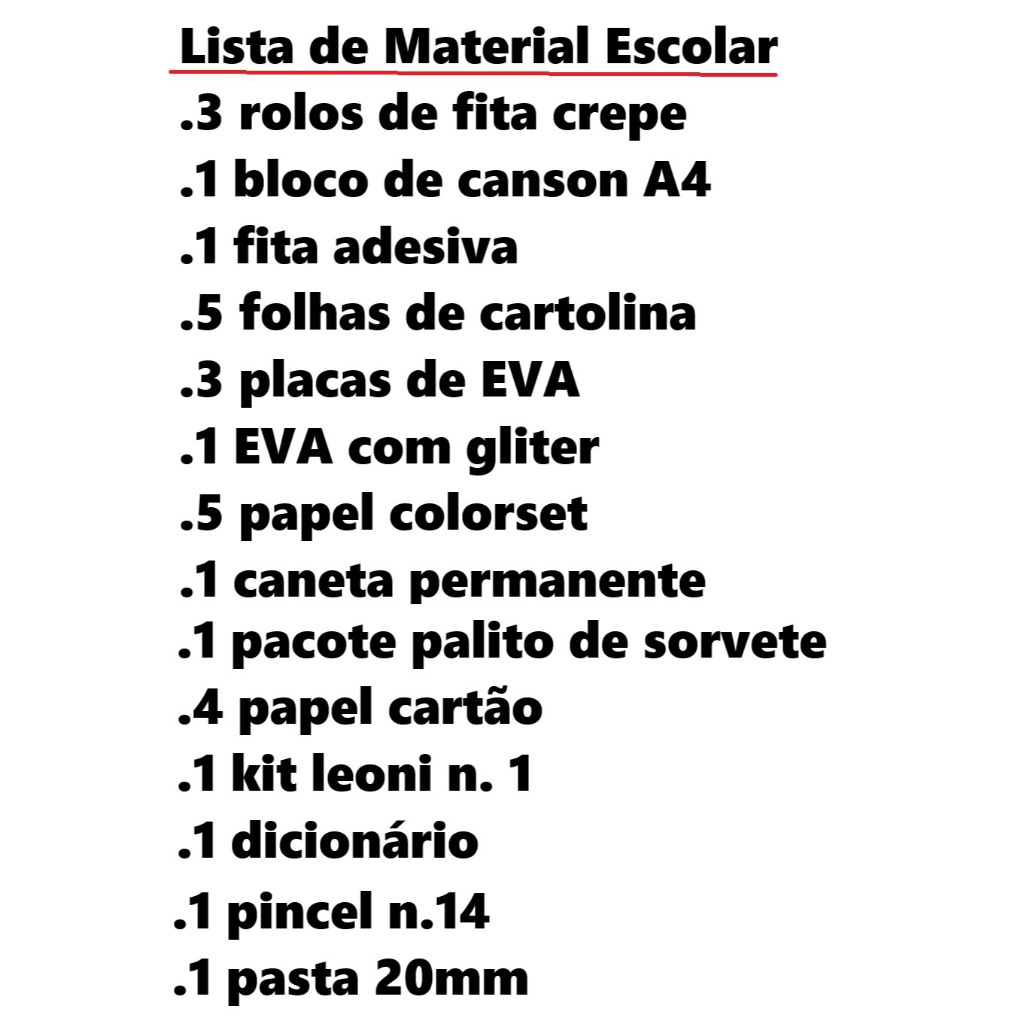

In [75]:
# Carregando a imagem para simples conferência
from PIL import Image
from IPython.display import display
img = Image.open('lista-material-escolar.jpg')
display(img)

In [69]:
# Nome do arquivo
documentName = "lista-material-escolar.jpg"

# Leitura dos bytes da imagem
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Instanciando o Textract
textract_client = boto3.client('textract', region_name='us-east-1')

# Executando Textract
response = textract_client.detect_document_text(Document={'Bytes': imageBytes})

# Recuperando os Blocks
blocks = response['Blocks']

In [70]:
# Validando o tipo do bloco
type(blocks)

list

**Após uma rápida avaliação do resultado constatou-se que os dados da lista de material encontravam-se nas linhsa 'BlockType' == 'LINE') no campo 'Text'**

In [71]:
# Varrendo a lista e apresentando apenas as linha
for b in blocks:
    if b['BlockType'] == 'LINE':
        print(b['Text'])

Lista de Material Escolar
.3 rolos de fita crepe
.1 bloco de canson A4
.1 fita adesiva
.5 folhas de cartolina
.3 placas de EVA
.1 EVA com gliter
.5 papel colorset
.1 caneta permanente
.1 pacote palito de sorvete
.4 papel cartão
.1 kit leoni n. 1
.1 dicionário
.1 pincel n.14
.1 pasta 20mm


In [72]:
# armazenando as linhas
linhas_list = []
for b in blocks:
    if b['BlockType'] == 'LINE':
        linhas_list.append(b['Text'])

In [73]:
linhas_list

['Lista de Material Escolar',
 '.3 rolos de fita crepe',
 '.1 bloco de canson A4',
 '.1 fita adesiva',
 '.5 folhas de cartolina',
 '.3 placas de EVA',
 '.1 EVA com gliter',
 '.5 papel colorset',
 '.1 caneta permanente',
 '.1 pacote palito de sorvete',
 '.4 papel cartão',
 '.1 kit leoni n. 1',
 '.1 dicionário',
 '.1 pincel n.14',
 '.1 pasta 20mm']

In [54]:
lista_material = remover_pontos_iniciais(linhas_list)

In [55]:
lista_material

['Lista de Material Escolar',
 '3 rolos de fita crepe',
 '1 bloco de canson A4',
 '1 fita adesiva',
 '5 folhas de cartolina',
 '3 placas de EVA',
 '1 EVA com gliter',
 '5 papel colorset',
 '1 caneta permanente',
 '1 pacote palito de sorvete',
 '4 papel cartão',
 '1 kit leoni n. 1',
 '1 dicionário',
 '1 pincel n.14',
 '1 pasta 20mm']

In [58]:
# Gravando o resultado como um JSON
salvar_lista_como_json(lista_material,'lista_material.json')

In [68]:
from IPython.display import HTML

html = """
<table>
  <thead>
    <tr>
      <th>Lista de Material Escolar</th>
    </tr>
  </thead>
  <tbody>
"""

for item in lista_material:
    if item != 'Lista de Material Escolar':
        html += f"    <tr><td style='text-align: left;'>{item}</td></tr>\n"

html += "  </tbody>\n</table>"

display(HTML(html))

Lista de Material Escolar
3 rolos de fita crepe
1 bloco de canson A4
1 fita adesiva
5 folhas de cartolina
3 placas de EVA
1 EVA com gliter
5 papel colorset
1 caneta permanente
1 pacote palito de sorvete
4 papel cartão


# Conclusão
A imagem em questão foi lida e processada com facilidade tendo em vista que rapidamente identificou-se que os valores encontravam-se nas linhas.<br>
A partir daí foi fácil armazenar o resultado num arquivo JSON e formatá-lo como uma tabela HTML no próprio notebook.